In [ ]:
# https://lightning.ai/docs/pytorch/stable/ecosystem/asr_nlp_tts.html

# https://docs.nvidia.com/deeplearning/nemo/user-guide/docs/en/stable/tts/models.html#fastpitch

# https://catalog.ngc.nvidia.com/orgs/nvidia/teams/nemo/models/tts_en_fastspeech_2

# https://github.com/NVIDIA/NeMo/blob/main/tutorials/tts/Vits_Training.ipynb

# https://github.com/NVIDIA/NeMo/blob/main/tutorials/tts/FastPitch_Data_Preparation.ipynb

#Installation

In [ ]:
"""
You can run either this notebook locally (if you have all the dependencies and a GPU) or on Google Colab.

Instructions for setting up Colab are as follows:
1. Open a new Python 3 notebook.
2. Import this notebook from GitHub (File -> Upload Notebook -> "GITHUB" tab -> copy/paste GitHub URL).
3. Connect to an instance with a GPU (Runtime -> Change runtime type -> select "GPU" for hardware accelerator).
4. Run this cell to set up dependencies.
5. Restart the runtime (Runtime -> Restart Runtime) for any upgraded packages to take effect.
"""

# If you're using Google Colab and not running locally, run this cell.

# Install dependencies
!sudo apt-get install sox libsndfile1 ffmpeg
!pip3 install wget text-unidecode matplotlib>=3.3.2
!pip3 install pynini

## Install NeMo
BRANCH = 'main'

# Install pynini
# !wget https://raw.githubusercontent.com/NVIDIA/NeMo/$BRANCH/nemo_text_processing/install_pynini.sh
# !bash install_pynini.sh

!python3 -m pip install "git+https://github.com/NVIDIA/NeMo.git@main#egg=nemo_toolkit[all]"



"""
Remember to restart the runtime for the kernel to pick up any upgraded packages (e.g. matplotlib)!
Alternatively, you can uncomment the exit() below to crash and restart the kernel, in the case
that you want to use the "Run All Cells" (or similar) option.
"""
exit()

#Load Configs

In [ ]:
BRANCH = "main"
!wget https://raw.githubusercontent.com/NVIDIA/NeMo/$BRANCH/examples/tts/vits.py
!(mkdir -p conf \
  && cd conf \
  && wget https://raw.githubusercontent.com/NVIDIA/NeMo/$BRANCH/examples/tts/conf/vits.yaml \
  && cd ..)

# additional files
!mkdir -p tts_dataset_files && cd tts_dataset_files \
&& wget https://raw.githubusercontent.com/NVIDIA/NeMo/$BRANCH/scripts/tts_dataset_files/ipa_cmudict-0.7b_nv23.01.txt \
&& wget https://raw.githubusercontent.com/NVIDIA/NeMo/$BRANCH/scripts/tts_dataset_files/heteronyms-052722 \
&& cd ..

--2023-09-17 08:15:40--  https://raw.githubusercontent.com/NVIDIA/NeMo/main/examples/tts/vits.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1216 (1.2K) [text/plain]
Saving to: ‘vits.py’

vits.py             100%[===================>]   1.19K  --.-KB/s    in 0s      

2023-09-17 08:15:40 (111 MB/s) - ‘vits.py’ saved [1216/1216]

--2023-09-17 08:15:40--  https://raw.githubusercontent.com/NVIDIA/NeMo/main/examples/tts/conf/vits.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5599 (5.5K) [text/plain]
Saving to: ‘vits.yaml’



# Prepare Data

In [ ]:
# https://docs.nvidia.com/deeplearning/nemo/user-guide/docs/en/stable/asr/datasets.html#librispeech
# https://github.com/NVIDIA/NeMo/blob/main/scripts/dataset_processing/get_librispeech_data.py
# http://www.openslr.org/12/

!sudo apt-get install sox

!rm -r datasets
!mkdir -p datasets

# !wget -P datasets https://www.openslr.org/resources/12/dev-clean.tar.gz
# !tar -xzvf datasets/dev-clean.tar.gz -C datasets

# train_data, test_data = "dev_clean", "test_clean"
# train_data, test_data = "train_clean_100", "test_clean"

!wget https://raw.githubusercontent.com/NVIDIA/NeMo/main/scripts/dataset_processing/get_librispeech_data.py
# !python get_librispeech_data.py --data_root=datasets --data_set="dev_clean,test_clean"
!python get_librispeech_data.py --data_root=datasets --data_set="train_clean_100,test_clean"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
sox is already the newest version (14.4.2+git20190427-2+deb11u2ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.
rm: cannot remove 'datasets': No such file or directory
--2023-09-17 08:15:49--  https://raw.githubusercontent.com/NVIDIA/NeMo/main/scripts/dataset_processing/get_librispeech_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7423 (7.2K) [text/plain]
Saving to: ‘get_librispeech_data.py’

get_librispeech_dat 100%[===================>]   7.25K  --.-KB/s    in 0s      

2023-09-17 08:15:50 (91.9 MB/s) - ‘get_librispeech_data.py’ saved [7423/7423]

100% 5.95G/5.95G [06:06<00:00, 17.4MB/s]
100% 585/585 [01:56<00:00,  5.0

#Load Model

In [1]:
from nemo.collections.tts.models import VitsModel



ModuleNotFoundError: ignored

#Training

```



# Copyright (c) 2022, NVIDIA CORPORATION.  All rights reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import pytorch_lightning as pl

from nemo.collections.tts.models.vits import VitsModel
from nemo.core.config import hydra_runner
from nemo.utils.exp_manager import exp_manager
from pytorch_lightning.loggers import TensorBoardLogger
logger = TensorBoardLogger("tb_logs", name="vits_model")

@hydra_runner(config_path="conf", config_name="vits")
def main(cfg):

    checkpoint_path = '/content/nemo_experiments/VITS/2023-09-16_13-52-19/checkpoints/VITS--loss_gen_all=43.9901-epoch=4-last.ckpt'
    # checkpoint_path = '/content/nemo_experiments/VITS/2023-09-16_13-52-19/checkpoints/VITS.nemo'
    
    trainer = pl.Trainer(
      logger=logger,
      use_distributed_sampler=False,
      strategy='ddp_find_unused_parameters_true',
      resume_from_checkpoint=checkpoint_path,
      **cfg.trainer
    )
    exp_manager(trainer, cfg.get("exp_manager", None))
    model = VitsModel(cfg=cfg.model, trainer=trainer)

    trainer.callbacks.extend([pl.callbacks.LearningRateMonitor()])
    trainer.fit(model)


if __name__ == '__main__':
    main()  # noqa pylint: disable=no-value-for-parameter


```

In [ ]:
!(python vits.py \
  model.sample_rate=16000 \
  train_dataset=/content/datasets/train_clean_100.json \
  validation_datasets=/content/datasets/test_clean.json \
  phoneme_dict_path=/content/tts_dataset_files/ipa_cmudict-0.7b_nv23.01.txt \
  heteronyms_path=/content/tts_dataset_files/heteronyms-052722 \
  trainer.max_epochs=25 \
  trainer.accelerator="gpu" \
  trainer.check_val_every_n_epoch=1 \
  trainer.devices=1)

2023-09-17 13:11:05.318263: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[NeMo W 2023-09-17 13:11:09 nemo_logging:349] /usr/local/lib/python3.10/dist-packages/hydra/_internal/hydra.py:119: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
    See https://hydra.cc/docs/1.2/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
      ret = run_job(
    
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
[NeMo I 2023-09-17 13:11:09 exp_manager:381] Experiments will be logged at /content/nemo_experiments/VITS/2023-09-17_13-11-09
[NeMo I 2023-09-17 13:11:09 exp_manager:815] TensorboardLogger has been set up
[NeMo W 2023-09-17 13:11:09 experimental:26] `<class 'nemo.collections.tts.models.vits.VitsModel'>` is experimental and not ready for production yet. Use at your own risk.

#Evaluation

--2023-09-16 15:21:41--  https://multilangaudiosamples.s3.us-east-2.amazonaws.com/LJ023-0089.wav
Resolving multilangaudiosamples.s3.us-east-2.amazonaws.com (multilangaudiosamples.s3.us-east-2.amazonaws.com)... 52.219.176.138, 3.5.128.121, 3.5.132.135, ...
Connecting to multilangaudiosamples.s3.us-east-2.amazonaws.com (multilangaudiosamples.s3.us-east-2.amazonaws.com)|52.219.176.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115558 (113K) [audio/wav]
Saving to: ‘LJ023-0089.wav.1’

LJ023-0089.wav.1    100%[===================>] 112.85K   162KB/s    in 0.7s    

2023-09-16 15:21:42 (162 KB/s) - ‘LJ023-0089.wav.1’ saved [115558/115558]

Duration (s): 2.619375
Transcript: That is not only my accusation.


[NeMo W 2023-09-16 15:22:24 experimental:26] `<class 'nemo.collections.tts.g2p.models.i18n_ipa.IpaG2p'>` is experimental and not ready for production yet. Use at your own risk.
[NeMo W 2023-09-16 15:22:26 i18n_ipa:124] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2023-09-16 15:22:26 experimental:26] `<class 'nemo.collections.common.tokenizers.text_to_speech.tts_tokenizers.IPATokenizer'>` is experimental and not ready for production yet. Use at your own risk.
[NeMo W 2023-09-16 15:22:26 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.dataset.TTSDataset

[NeMo I 2023-09-16 15:22:26 features:289] PADDING: 1
[NeMo I 2023-09-16 15:22:26 features:297] STFT using exact pad
[NeMo I 2023-09-16 15:22:28 save_restore_connector:249] Model VitsModel was successfully restored from /content/nemo_experiments/VITS/2023-09-16_14-47-56/checkpoints/VITS.nemo.
predicted audio


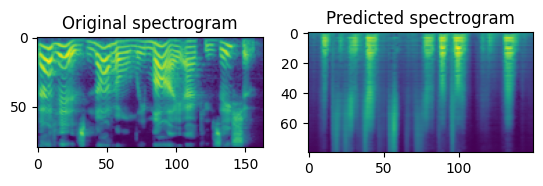

In [ ]:
!wget https://multilangaudiosamples.s3.us-east-2.amazonaws.com/LJ023-0089.wav

from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
import torch
import librosa
import soundfile as sf

target_sr = 16000
from nemo.collections.tts.models import VitsModel

audio_path = "./LJ023-0089.wav"
text_raw = "That is not only my accusation."


audio_data, orig_sr = sf.read(audio_path)
if orig_sr != target_sr:
    audio_data = librosa.core.resample(audio_data, orig_sr=orig_sr, target_sr=target_sr)

# Let's double-check that everything matches up!
print(f"Duration (s): {len(audio_data)/target_sr}")
print("Transcript:", text_raw)
ipd.Audio(audio_data, rate=target_sr)
# model = VitsModel.from_pretrained("tts_en_lj_vits").cpu().eval()

model = VitsModel.restore_from("/content/nemo_experiments/VITS/2023-09-16_14-47-56/checkpoints/VITS.nemo").cpu().eval()


tokens = model.parse(text_raw)
audio_pred = model.convert_text_to_waveform(tokens=tokens).cpu().detach().numpy()

print("predicted audio")
ipd.Audio(audio_pred, rate=target_sr)
audio_to_mel = model.audio_to_melspec_processor


len_audio = torch.tensor(len(audio_data)).view(1, -1)

spec_pred, _ = audio_to_mel(torch.tensor(audio_pred).view(1, -1), len_audio)
spec_orig, _ = audio_to_mel(torch.tensor(audio_data).view(1, -1), len_audio)
fig, ax = plt.subplots(1, 2)

ax[0].imshow(spec_orig[0][0].cpu().detach())
ax[1].imshow(spec_pred[0][0].cpu().detach())

ax[0].set_title('Original spectrogram')
ax[1].set_title('Predicted spectrogram')
fig.show()


# Test

In [ ]:
# Generate audio
import soundfile as sf
from IPython.display import display, Audio
import torch
import time

# !gzip "/content/nemo_experiments/VITS/2023-09-15_21-14-16/checkpoints/VITS--loss_gen_all=115.6716-epoch=4-last.ckpt"


audio_generator = VitsModel.restore_from("/content/nemo_experiments/VITS/2023-09-16_14-47-56/checkpoints/VITS.nemo")

START = time.time()

with torch.no_grad():
    parsed = audio_generator.parse("Achieves state-of-the-art audio quality by capturing the uncertainties in the prediction. The outputs are generally considered to be very natural and closer to human speech.")
    audio = audio_generator.convert_text_to_waveform(tokens=parsed)

# Save the audio to disk in a file called speech.wav
if isinstance(audio, torch.Tensor):
    audio = audio.to('cpu').numpy()

print(time.time() - START)

display(Audio(audio, rate=22050))

# sf.write("speech.wav", audio.T, 22050, format="WAV")

[NeMo W 2023-09-16 15:28:44 experimental:26] `<class 'nemo.collections.tts.g2p.models.i18n_ipa.IpaG2p'>` is experimental and not ready for production yet. Use at your own risk.
[NeMo W 2023-09-16 15:28:45 i18n_ipa:124] apply_to_oov_word=None, This means that some of words will remain unchanged if they are not handled by any of the rules in self.parse_one_word(). This may be intended if phonemes and chars are both valid inputs, otherwise, you may see unexpected deletions in your input.
[NeMo W 2023-09-16 15:28:45 experimental:26] `<class 'nemo.collections.common.tokenizers.text_to_speech.tts_tokenizers.IPATokenizer'>` is experimental and not ready for production yet. Use at your own risk.
[NeMo W 2023-09-16 15:28:45 modelPT:161] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.dataset.TTSDataset

[NeMo I 2023-09-16 15:28:45 features:289] PADDING: 1
[NeMo I 2023-09-16 15:28:45 features:297] STFT using exact pad
[NeMo I 2023-09-16 15:28:47 save_restore_connector:249] Model VitsModel was successfully restored from /content/nemo_experiments/VITS/2023-09-16_14-47-56/checkpoints/VITS.nemo.


[NeMo W 2023-09-16 15:28:47 vits:148] parse() is meant to be called in eval mode.


1.2387049198150635
